In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import *
from scipy import signal

In [5]:
#Step 1: Smartphone Video Recording

In [ ]:
#Capture the video using the camera

# Open the camera
cap = cv2.VideoCapture(0)

# Set the video resolution
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

# Set the video duration in seconds
duration = 5 

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mpv4')
#Video captured at 30 fps
out = cv2.VideoWriter('Video Dataset/Yash.mp4', fourcc, 30.0, (640, 480))

# Capture the video
start_time = cv2.getTickCount()
while (cv2.getTickCount() - start_time) / cv2.getTickFrequency() < duration:
    ret, frame = cap.read()
    if ret == True:
        # Write the frame to the output file
        out.write(frame)

# Release the camera and the output file
cap.release()
out.release()

In [7]:
#Step 2: Generating PPG Signals

In [22]:
# Load the video
# cap = cv2.VideoCapture('Video Dataset/Yash.mp4')
cap = cv2.VideoCapture('Video Dataset/Yash.mp4')

ppg_signal_arr = []

# Loop through the frames
while True:
    # Read the frame
    ret, frame = cap.read()

    # If the frame is not read, break the loop
    if not ret:
        break

    # Calculate the average value of the red, green, and blue channels
    ave_r = np.mean(frame[:, :, 2])
    ave_g = np.mean(frame[:, :, 1])
    ave_b = np.mean(frame[:, :, 0])

    max_val = max(ave_r, max(ave_g, ave_b))
    ppg_signal_arr.append(max_val)

# Release the video capture and writer
cap.release()

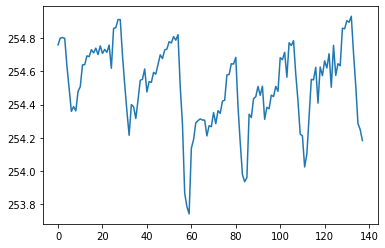

In [23]:
plt.plot(ppg_signal_arr)
plt.show()

In [10]:
#Step 3: Applying a butterworth filter to the signal

In [30]:
def butterFil(signal):
    filt = butter(5, [0.15, 10], 'bp', fs = 40, output = 'sos')
    final = []

    for i in range(0, len(signal), 18):
        filtered = sosfilt(filt, signal[i:i+18])
        for j in filtered:
            final.append(j)

    t = np.linspace(0,60,len(final))
    
    ret = [final, t]
    return (ret)

In [31]:
filtered_data = butterFil(ppg_signal_arr)

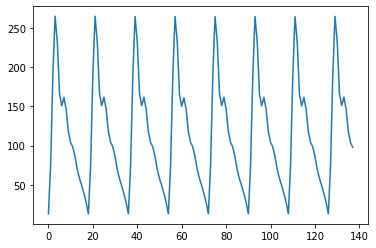

In [32]:
plt.plot(filtered_data[0])
plt.show()

In [33]:
#Derivative Filter

def derivativeFil(signal):

    sig = []
    der1 = []
    der2 = []
    
    #1st Derivative
    delta = 0.001
    for i in range(1, len(signal)-1):
        d = (signal[i+1]-signal[i-1])/(2*delta)
        der1.append(d)
    
    #2nd Derivative
    for i in range(1, len(der1)-1):
        d = (der1[i+1]-der1[i-1])/(delta**2)
        der2.append(d)
    
    return [der1, der2]

In [34]:
derivative_Filter = derivativeFil(filtered_data[0])

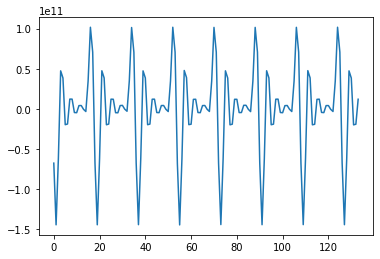

In [35]:
#Plotting the second derivative signal

plt.plot(derivative_Filter[1])
plt.show()